Qnatitative: Basically this type can be measured by numerical variables . So, in actual & forecast datasets,all the time columns consist with quatitative variables..So,I considered the mean,median,mode,standard deviation & skewness of the data within each time column(across all the plants)-in 1st sheet on both actual & forecast datasets

In [1]:
import pandas as pd
import os

# Acutal

In [2]:
data_frames_1=[]
data_frames_2=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    df2=pd.melt(df1,id_vars=['Power_Plant'])
    df1['Date']=date
    df2['Date']=date
    data_frames_1.append(df1)
    data_frames_2.append(df2)


In [3]:
data_frames_1[0].head()

,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
1,Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
3,Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,...,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2020-07-01
4,Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,...,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0,2020-07-01
5,Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,...,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0,2020-07-01


## median

In [4]:
#median in each time frame....
data_frames_1[0].median()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/3081235149.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_1[0].median()


00:00:00     0.0
00:30:00     0.0
01:00:00     0.0
01:30:00     0.0
02:00:00     0.0
02:30:00     0.0
03:00:00     0.0
03:30:00     0.0
04:00:00     0.0
04:30:00     0.0
05:00:00     3.0
05:30:00    28.5
06:00:00    38.5
06:30:00    48.0
07:00:00    39.0
07:30:00    39.0
08:00:00    48.5
08:30:00    53.0
09:00:00    65.0
09:30:00    65.0
10:00:00    65.0
10:30:00    66.0
11:00:00    77.0
11:30:00    67.5
12:00:00    71.0
12:30:00    61.0
13:00:00    63.5
13:30:00    61.0
14:00:00    67.0
14:30:00    67.0
15:00:00    62.0
15:30:00    62.0
16:00:00    62.0
16:30:00    61.5
17:00:00    61.0
17:30:00    61.0
18:00:00    70.0
18:30:00    92.5
19:00:00    92.0
19:30:00    87.5
20:00:00    75.0
20:30:00    75.0
21:00:00    64.5
21:30:00    50.5
22:00:00    42.5
22:30:00    35.0
23:00:00    12.5
23:30:00     0.0
dtype: float64

## mean

In [44]:
#mean in each time frame in the 1st sheet....
data_frames_1[0].mean()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/2168811272.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_1[0].mean()


00:00:00     74.921053
00:30:00     73.157895
01:00:00     72.500000
01:30:00     70.684211
02:00:00     69.342105
02:30:00     68.789474
03:00:00     68.736842
03:30:00     69.105263
04:00:00     71.736842
04:30:00     74.184211
05:00:00     82.736842
05:30:00     89.763158
06:00:00     93.026316
06:30:00     90.815789
07:00:00     90.052632
07:30:00     91.894737
08:00:00     96.973684
08:30:00    101.157895
09:00:00    103.763158
09:30:00    105.421053
10:00:00    105.815789
10:30:00    107.473684
11:00:00    109.578947
11:30:00    111.131579
12:00:00    108.921053
12:30:00    106.000000
13:00:00    105.684211
13:30:00    105.473684
14:00:00    107.315789
14:30:00    108.157895
15:00:00    107.500000
15:30:00    107.526316
16:00:00    107.289474
16:30:00    106.342105
17:00:00    103.789474
17:30:00    101.763158
18:00:00    109.000000
18:30:00    123.552632
19:00:00    128.105263
19:30:00    123.842105
20:00:00    118.263158
20:30:00    113.131579
21:00:00    107.210526
21:30:00   

In [6]:
#mode in first time frame in the 1st sheet....
data_frames_1[0]['00:00:00'].mode() 

0    0.0
dtype: object

In [7]:
data_frames_1[0]['00:30:00'].mode() 

0    0.0
dtype: object

In [8]:
cols=list(data_frames_1[0].columns)

In [9]:
cols

['Power_Plant',
 '00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00',
 'Date']

In [10]:
cols.remove('Date')
cols.remove('Power_Plant')

In [11]:
cols

['00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

## mode

In [12]:
#mode in each time frame(across the plants) in the first sheet
for i in cols:
    print(data_frames_1[0][i].mode()) 

0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dtype: object
0    0.0
dt

## Standard Deviation

In [13]:
#standard deviation in all the columns....
data_frames_1[0].std()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/1385977204.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_1[0].std()


00:00:00    150.490259
00:30:00    150.374942
01:00:00    150.446677
01:30:00    151.102275
02:00:00    151.481205
02:30:00    151.415333
03:00:00    151.512498
03:30:00    151.500743
04:00:00    151.243081
04:30:00    150.387042
05:00:00    149.568150
05:30:00    149.615441
06:00:00    148.970247
06:30:00    147.225302
07:00:00    146.992912
07:30:00    148.907152
08:00:00    150.194016
08:30:00    149.478287
09:00:00    149.151009
09:30:00    149.060052
10:00:00    148.477654
10:30:00    148.436307
11:00:00    148.272509
11:30:00    148.636900
12:00:00    148.697658
12:30:00    149.249112
13:00:00    149.006277
13:30:00    148.383495
14:00:00    148.133451
14:30:00    148.550569
15:00:00    149.011472
15:30:00    149.167190
16:00:00    149.208707
16:30:00    149.673749
17:00:00    149.566790
17:30:00    148.938303
18:00:00    148.653415
18:30:00    146.543545
19:00:00    147.326222
19:30:00    147.277184
20:00:00    148.581161
20:30:00    151.190621
21:00:00    151.526495
21:30:00   

In [14]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np

In [16]:
x=np.array(list(data_frames_1[0]['00:00:00']))

In [17]:
x

array([ 20.,   0.,  10.,  91.,  40.,   0.,  96.,   0.,   0.,   0.,  72.,
         0.,   0., 105., 548., 540., 540.,  66., 118.,   0.,  90.,   0.,
         0.,   0.,   0., 280.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 100., 131.])

## Check skewness (by histograms)

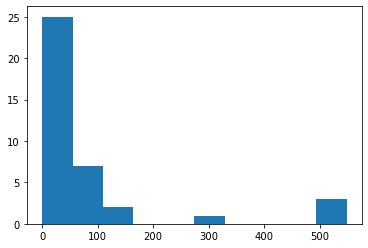

In [18]:
plt.hist(x)
plt.show()

00:00:00


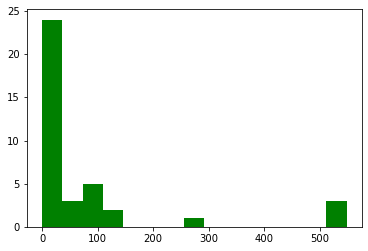

00:30:00


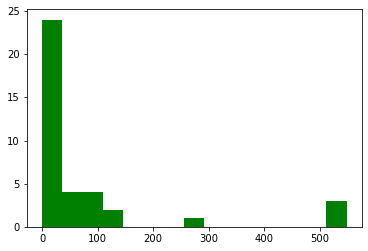

01:00:00


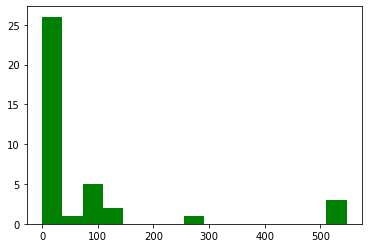

01:30:00


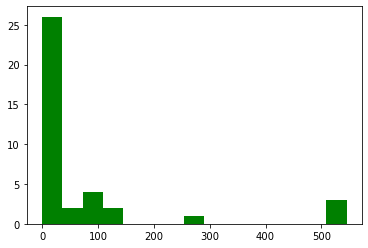

02:00:00


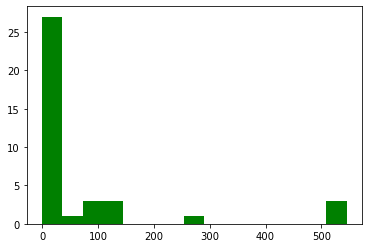

02:30:00


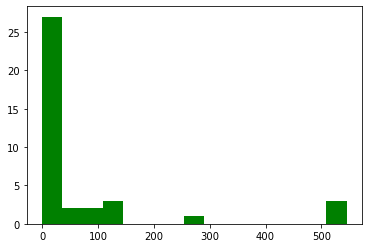

03:00:00


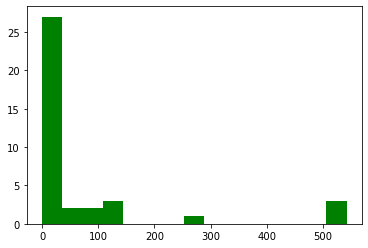

03:30:00


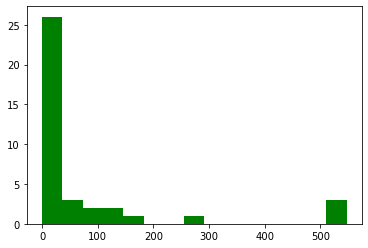

04:00:00


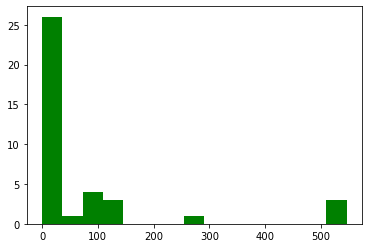

04:30:00


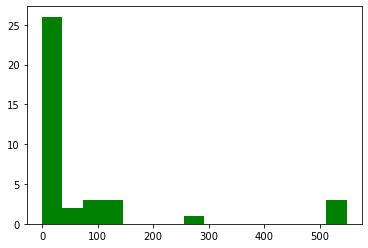

05:00:00


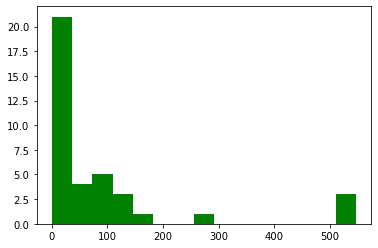

05:30:00


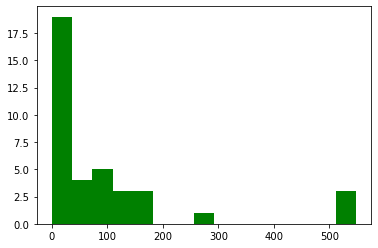

06:00:00


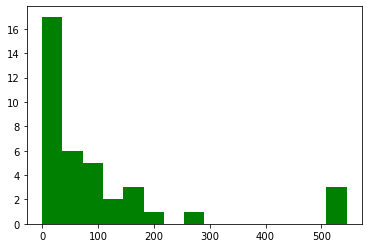

06:30:00


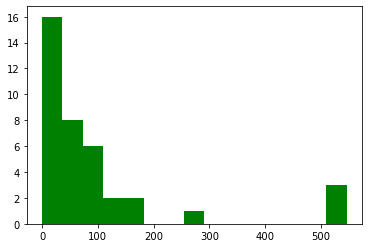

07:00:00


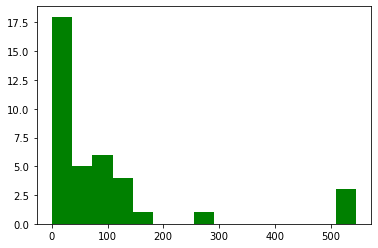

07:30:00


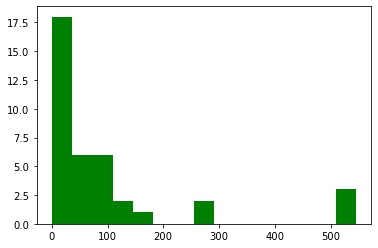

08:00:00


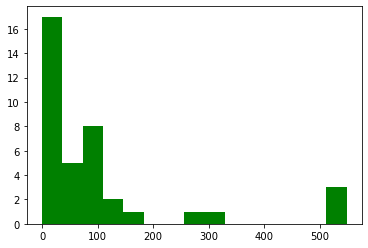

08:30:00


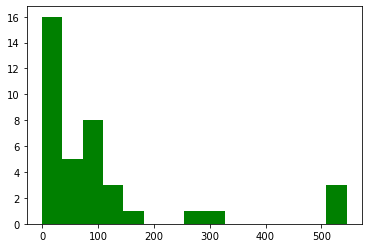

09:00:00


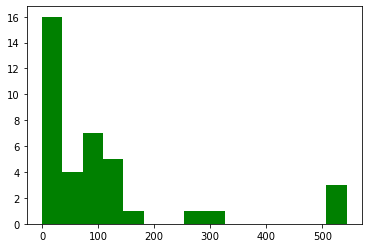

09:30:00


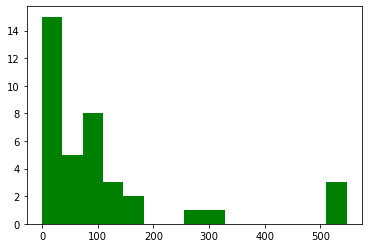

10:00:00


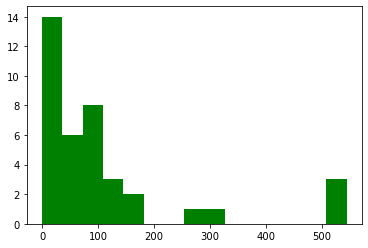

10:30:00


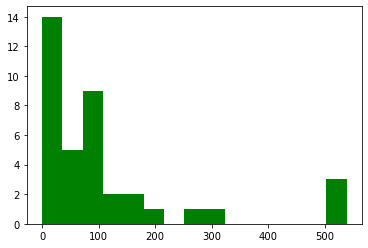

11:00:00


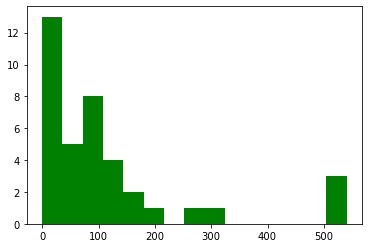

11:30:00


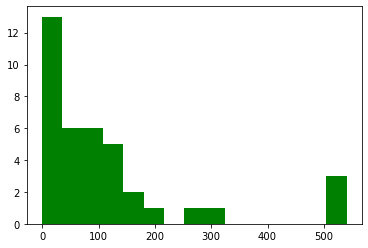

12:00:00


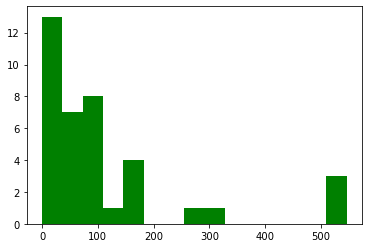

12:30:00


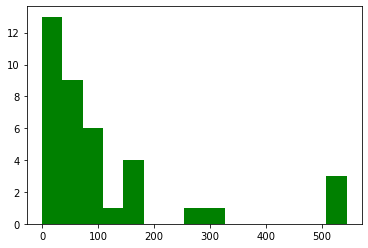

13:00:00


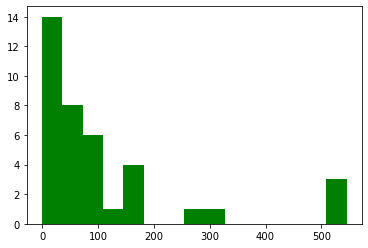

13:30:00


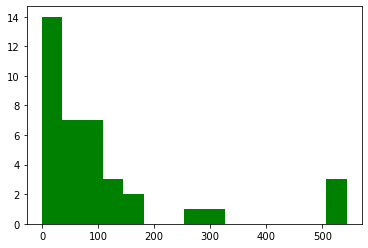

14:00:00


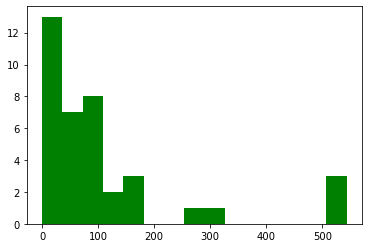

14:30:00


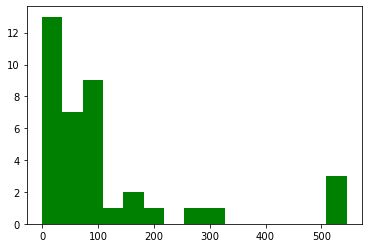

15:00:00


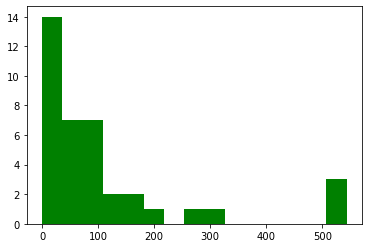

15:30:00


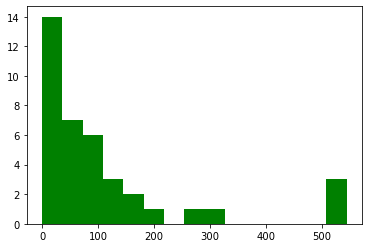

16:00:00


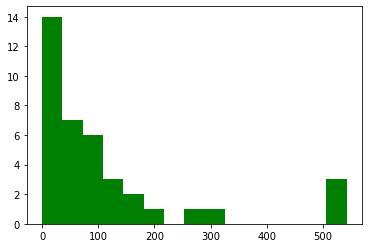

16:30:00


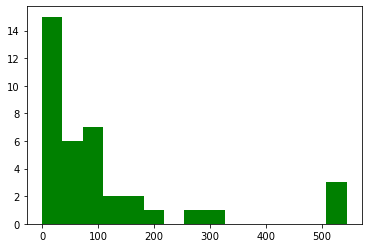

17:00:00


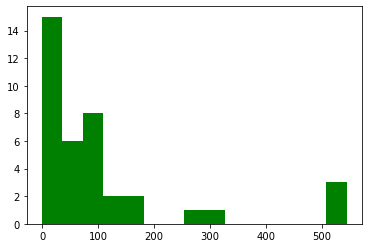

17:30:00


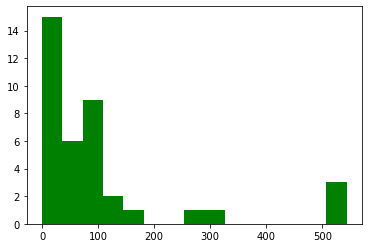

18:00:00


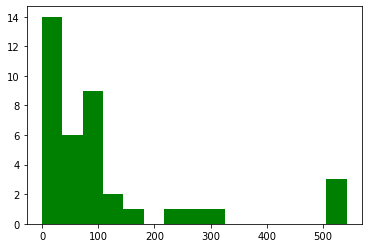

18:30:00


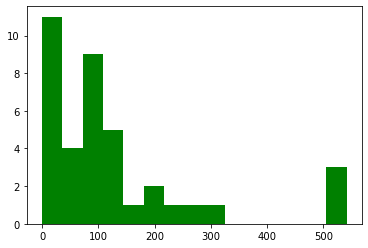

19:00:00


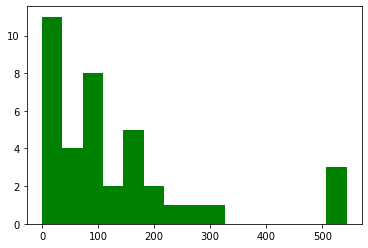

19:30:00


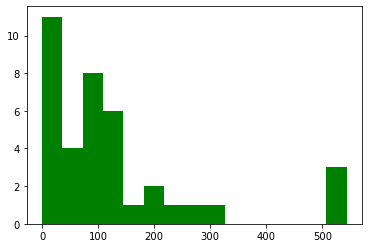

20:00:00


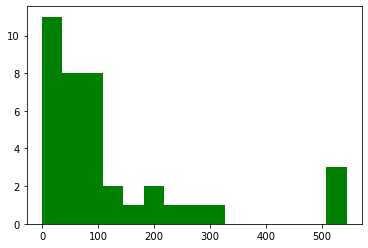

20:30:00


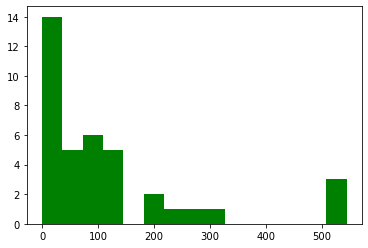

21:00:00


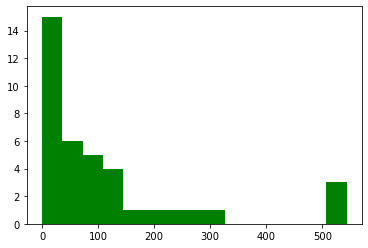

21:30:00


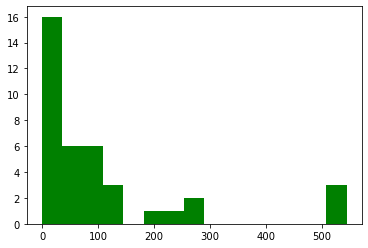

22:00:00


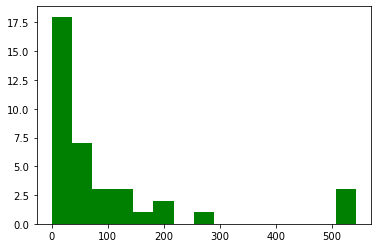

22:30:00


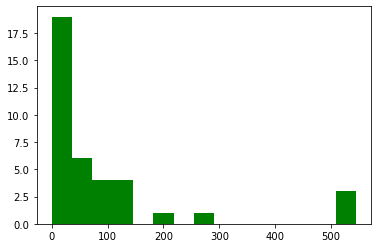

23:00:00


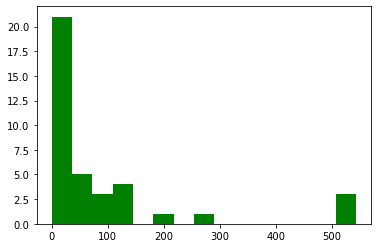

23:30:00


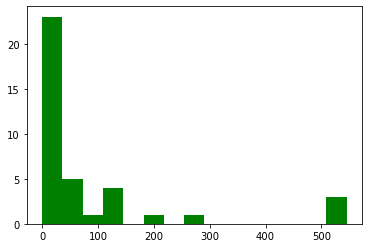

In [19]:
#all the time frames histograms across all the plants....
for i in cols:
    x=np.array(list(data_frames_1[0][i]))
    print(i)
    plt.hist(x,color='green',bins=15)
    plt.show()

# Forecast

In [20]:
#get all the files in the forecast folder..........
def fileList(path):
    listOfFiles = os.listdir(path)
    files=[]
    
    for file in listOfFiles:
        fullPath = os.path.join(path, file) #full path for the file
        if os.path.isdir(fullPath): #if there are sub folders.....
            files = files + fileList(fullPath) #recursively loop through the sub folder
        else:
            files.append(fullPath)
                
    return files

all_the_files=fileList(r'E:\Desktop\Datasets\forcast_july')

In [21]:
##############
data_frames_3=[]
data_frames_4=[]
for file in all_the_files:
    df=pd.read_excel(file)
    df.columns = df.iloc[0] #make columns as 0th row items..
    columns=df.columns
    date=columns[1].date() 
    df=df.drop(0) #drop 0th row items
    df.columns = df.iloc[0] #make columns as 0th row items..
    df=df.drop(1)  #drop 1st row items
    plants_temp=df.iloc[:,0] #all the items in plant column(this includes unnessasary items)
    plants=[]
    #get only the correct plants...
    for plant in plants_temp:
        if plant=='Total Generation':
            break
        else:
            plants.append(plant)
    df = df.loc[:, df.columns.notnull()] #remove nan columns.............
    z=len(plants) #only get the relevant rows...............
    df=df.head(z) #only get the dataframe which contains the needed rows...
    df.insert(0, 'Power_Plant', plants)
    df=df.drop(columns=df.columns[-1:],axis=1) #drop the last column.......
    df3=pd.melt(df,id_vars=['Power_Plant']) #reshape the df using melt function...
    df3['Date']=date
    df['Date']=date
    data_frames_3.append(df3)
    data_frames_4.append(df)

In [22]:
data_frames_3[0].head()

,Power_Plant,1,value,Date
0,WPS,00:00:00,0,2020-07-01
1,Cany,00:00:00,0,2020-07-01
2,Olax,00:00:00,10,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [23]:
data_frames_4[0].head()

1,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
2,WPS,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,2020-07-01
3,Cany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-07-01
4,Olax,10,10,10,10,10,10,10,10,10,...,10.895,10.895,10,10,10,10,10,10,0,2020-07-01
5,Nlax,60.636,60.636,60.636,59.362,59.312,58.312,58.812,59.112,20.212,...,93.636,60.636,60.636,60.636,21.97,21.97,21.97,0,0,2020-07-01
6,Polp,78.479,58.347,31.008,6.1039,6.1039,6.1039,6.1039,6.1039,18.052,...,56.114,56.114,38.31,38.31,18.933,6.1039,31.762,7.923,0,2020-07-01


## median

In [24]:
#median in each time frame....
data_frames_4[0].median()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/220805517.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_4[0].median()


1
00:00:00     0.0000
00:30:00     0.0000
01:00:00     0.0000
01:30:00     0.0000
02:00:00     0.0000
02:30:00     0.0000
03:00:00     0.0000
03:30:00     0.0000
04:00:00     0.0000
04:30:00     0.0000
05:00:00    13.5785
05:30:00    17.0000
06:00:00    15.0000
06:30:00    15.0000
07:00:00    15.0000
07:30:00    20.0000
08:00:00    22.0000
08:30:00    24.0000
09:00:00    24.0000
09:30:00    24.0000
10:00:00    24.0000
10:30:00    24.5000
11:00:00    26.0000
11:30:00    27.9505
12:00:00    27.0000
12:30:00    24.0000
13:00:00    24.0000
13:30:00    24.0000
14:00:00    24.0000
14:30:00    24.0000
15:00:00    29.2855
15:30:00    29.2855
16:00:00    29.2855
16:30:00    24.0000
17:00:00    24.0000
17:30:00    24.0000
18:00:00    29.2855
18:30:00    37.9320
19:00:00    37.9320
19:30:00    24.0000
20:00:00    22.0000
20:30:00    22.0000
21:00:00    20.0000
21:30:00    13.5675
22:00:00     0.0000
22:30:00     0.0000
23:00:00     0.0000
23:30:00     0.0000
dtype: float64

## mean

In [25]:
#mean in each time frame in the 1st sheet....
data_frames_4[0].mean()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/2575524503.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_4[0].mean()


1
00:00:00    33.318173
00:30:00    32.636350
01:00:00    32.136364
01:30:00    31.431816
02:00:00    31.409089
02:30:00    30.954543
03:00:00    31.181816
03:30:00    31.318173
04:00:00    32.568166
04:30:00    34.477250
05:00:00    37.363614
05:30:00    40.159077
06:00:00    42.272730
06:30:00    40.795457
07:00:00    41.272741
07:30:00    43.090914
08:00:00    45.250005
08:30:00    46.840914
09:00:00    47.727277
09:30:00    47.477277
10:00:00    47.568186
10:30:00    49.318186
11:00:00    49.727277
11:30:00    50.340914
12:00:00    49.772732
12:30:00    48.204550
13:00:00    47.704550
13:30:00    47.954550
14:00:00    48.704550
14:30:00    48.954550
15:00:00    48.477273
15:30:00    48.840909
16:00:00    48.590909
16:30:00    46.954545
17:00:00    46.636364
17:30:00    46.659091
18:00:00    50.636364
18:30:00    55.659091
19:00:00    54.795455
19:30:00    52.590909
20:00:00    50.204545
20:30:00    48.159000
21:00:00    45.454545
21:30:00    42.636364
22:00:00    38.636361
22:30:00

## mode

In [26]:
li=[]
for i in data_frames_4[0].columns:
    li.append(str(i))
li

['Power_Plant',
 '00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00',
 'Date']

In [27]:
li.remove('Date')
li.remove('Power_Plant')
li

['00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

In [28]:
li

['00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

## Check skewness (by histograms)

00:00:00


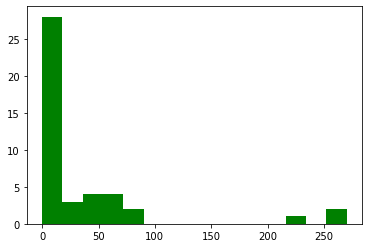

00:30:00


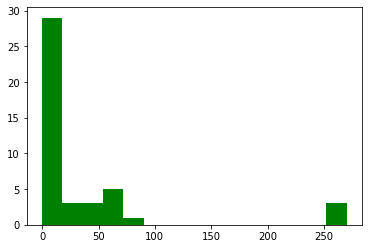

01:00:00


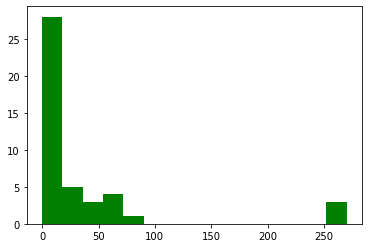

01:30:00


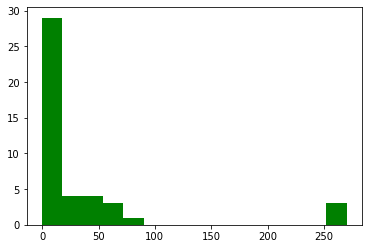

02:00:00


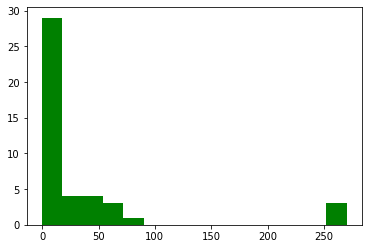

02:30:00


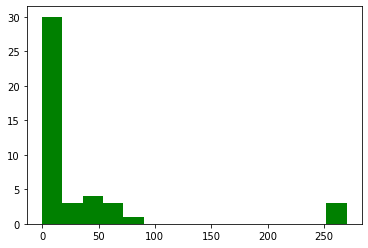

03:00:00


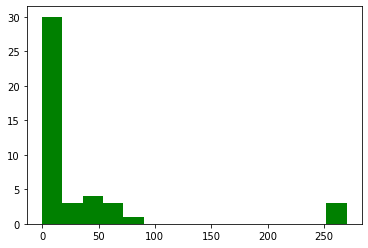

03:30:00


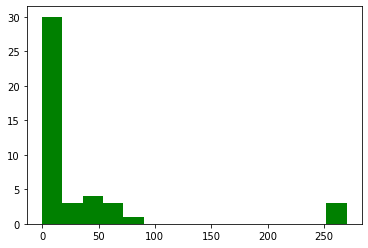

04:00:00


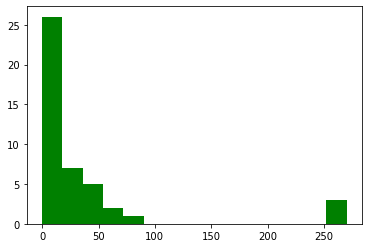

04:30:00


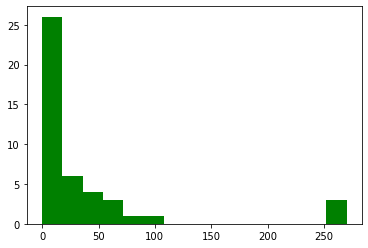

05:00:00


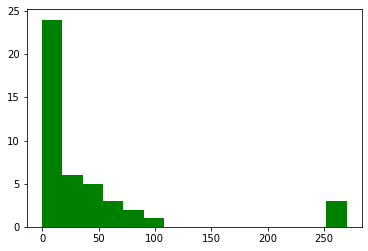

05:30:00


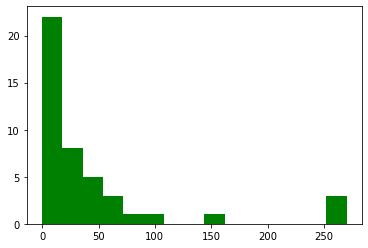

06:00:00


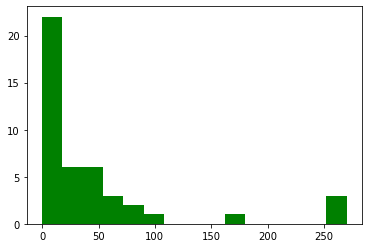

06:30:00


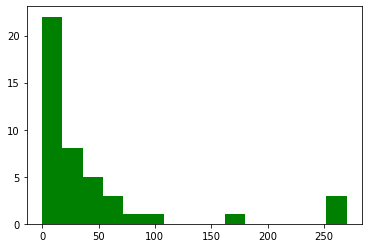

07:00:00


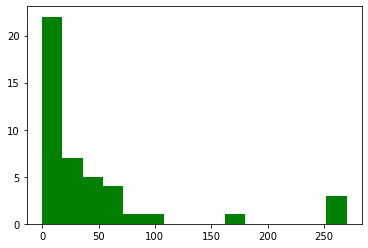

07:30:00


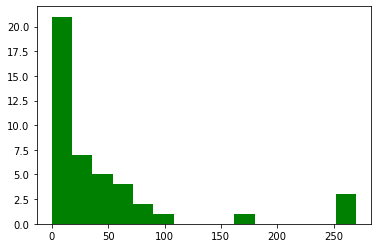

08:00:00


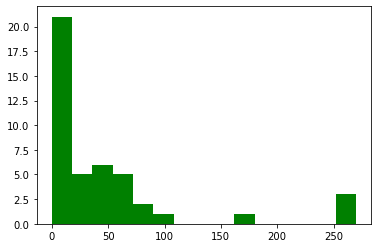

08:30:00


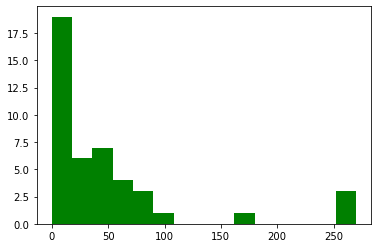

09:00:00


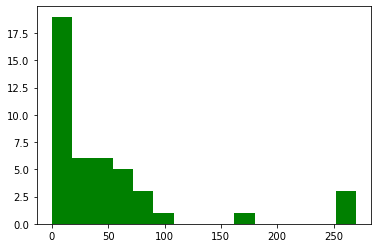

09:30:00


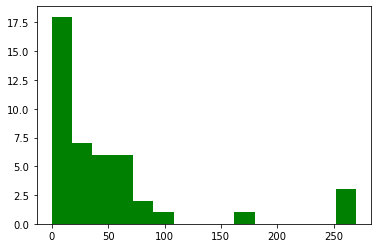

10:00:00


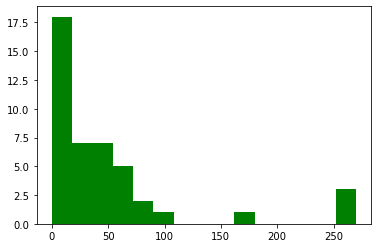

10:30:00


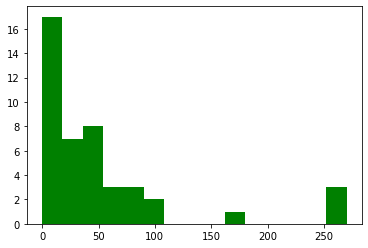

11:00:00


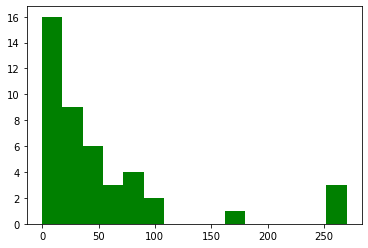

11:30:00


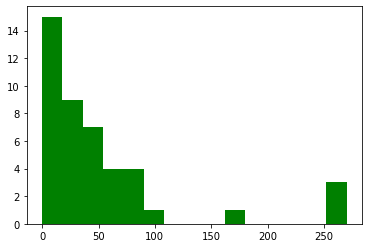

12:00:00


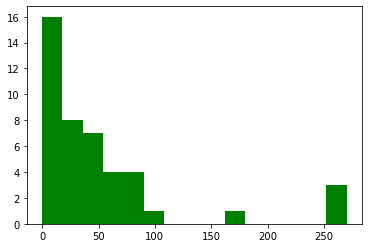

12:30:00


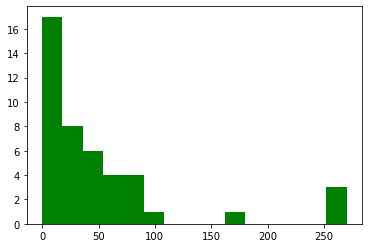

13:00:00


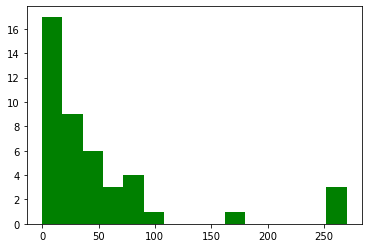

13:30:00


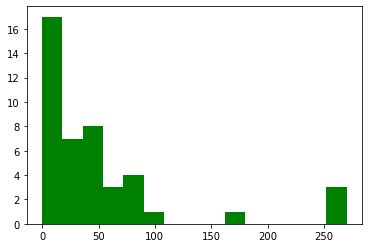

14:00:00


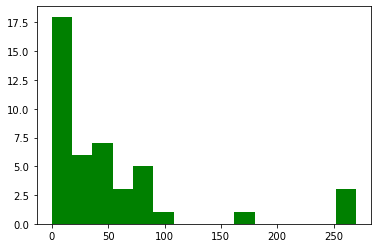

14:30:00


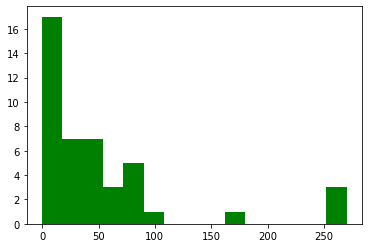

15:00:00


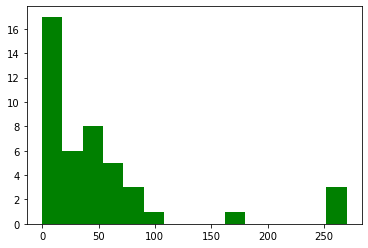

15:30:00


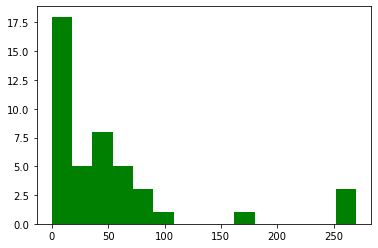

16:00:00


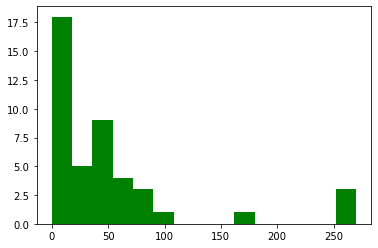

16:30:00


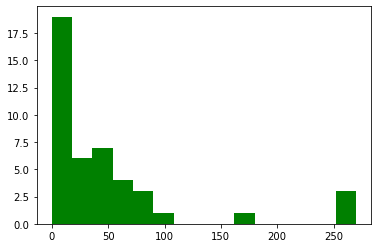

17:00:00


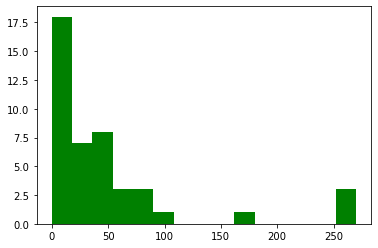

17:30:00


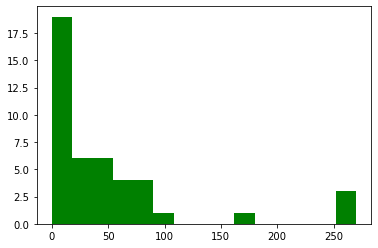

18:00:00


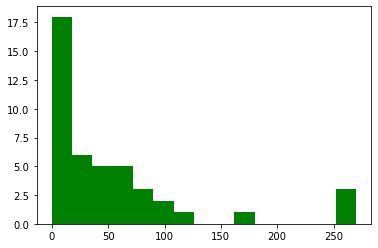

18:30:00


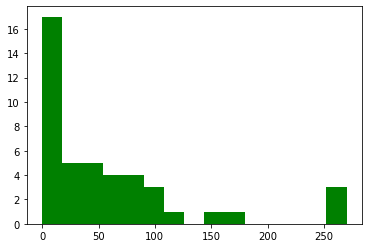

19:00:00


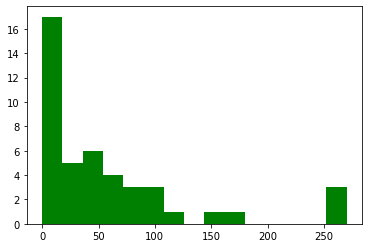

19:30:00


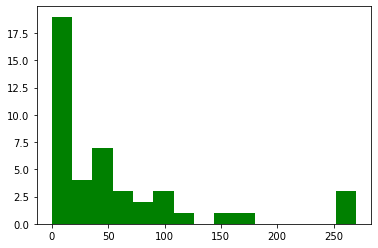

20:00:00


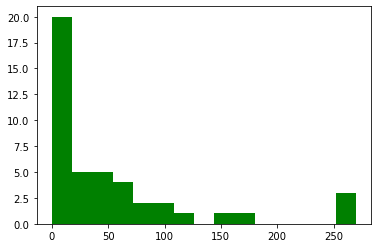

20:30:00


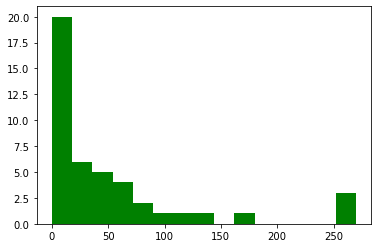

21:00:00


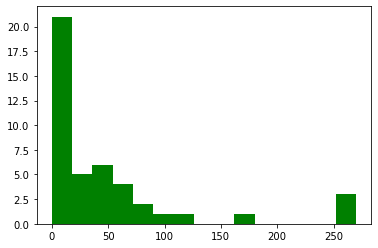

21:30:00


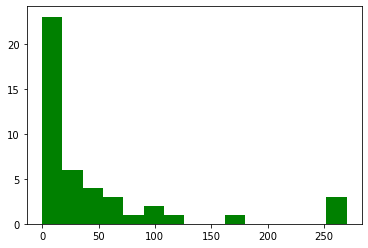

22:00:00


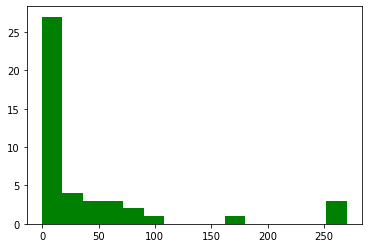

22:30:00


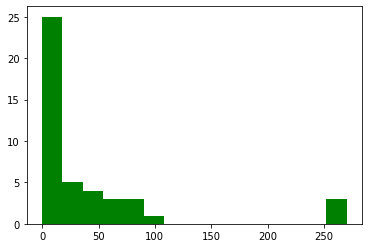

23:00:00


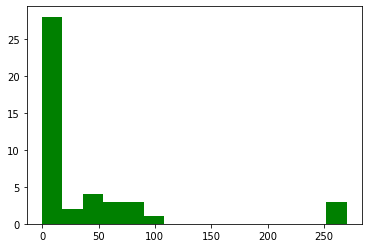

23:30:00


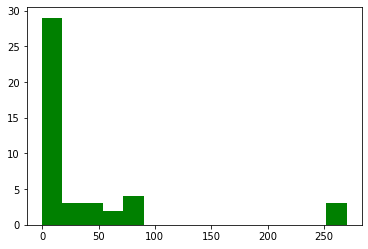

In [40]:
#all the time frames histograms across all the plants....
for i in range(len(li)):
    x=np.array(list(data_frames_4[0].iloc[:,i+1]))
    print(li[i])
    plt.hist(x,color='green',bins=15)
    plt.show()

In [36]:
data_frames_4[0].iloc[:,2]

2          0
3          0
4         10
5     60.636
6     58.347
7          0
8     31.376
9          0
10         0
11         0
12    26.222
13         0
14         0
15         0
16       270
17       270
18       259
19         0
20         0
21         0
22        54
23        63
24      32.9
25        45
26         0
27     37.18
28         0
29    8.3384
30         0
31         0
32         0
33         0
34         0
35        85
36         0
37        50
38         0
39         0
40         0
41         0
42         0
43        17
44         0
45        58
Name: 00:30:00, dtype: object

## mode

In [43]:
#mode in each time frame(across the plants) in the first sheet
for i in range(len(li)):
    print(data_frames_4[0].iloc[:,i+1].mode()) 

0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype:

## Standard Deviation

In [41]:
#standard deviation in all the columns....
data_frames_4[0].std()

C:\Users\RAVI\AppData\Local\Temp/ipykernel_3224/1673537762.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frames_4[0].std()


1
00:00:00    66.185536
00:30:00    68.146671
01:00:00    68.957486
01:30:00    69.020986
02:00:00    68.989927
02:30:00    69.119190
03:00:00    69.038001
03:30:00    68.952220
04:00:00    68.602579
04:30:00    68.878650
05:00:00    68.544803
05:30:00    70.095935
06:00:00    70.787979
06:30:00    70.535710
07:00:00    70.502500
07:30:00    70.330186
08:00:00    70.031936
08:30:00    69.710524
09:00:00    69.566016
09:30:00    69.386984
10:00:00    69.307813
10:30:00    69.358681
11:00:00    69.573124
11:30:00    69.132924
12:00:00    69.240464
12:30:00    69.783750
13:00:00    69.467612
13:30:00    69.427958
14:00:00    69.479924
14:30:00    69.367498
15:00:00    69.045772
15:30:00    69.198987
16:00:00    69.136958
16:30:00    69.748683
17:00:00    69.723096
17:30:00    70.253042
18:00:00    70.807271
18:30:00    72.246086
19:00:00    71.791492
19:30:00    72.248411
20:00:00    72.674387
20:30:00    72.448135
21:00:00    71.571592
21:30:00    72.363074
22:00:00    72.171370
22:30:00